___
# Sonar
___

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.mines
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.rocks

--2020-09-01 13:35:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87776 (86K) [application/x-httpd-php]
Saving to: ‘sonar.all-data’

sonar.all-data      100%[===================>]  85.72K  --.-KB/s    in 0.1s    

2020-09-01 13:35:14 (660 KB/s) - ‘sonar.all-data’ saved [87776/87776]

--2020-09-01 13:35:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.mines
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49217 (48K) [application/x-httpd-php]
Saving to: ‘sonar.mines’

sonar.mines     

___
## Information on the dataset
___

###Problem Statement
* The problem is to predict metal or rock objects from sonar return data. Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The label associated with each record contains the letter R if the object is a rock and M if it is a mine (metal cylinder).

###Data Set description 
* The numbers in the features are in increasing order of aspect angle, but they do not encode the angle directly.

###
* The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions.
* The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions.
* The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

* `Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.`

* The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

___
### Importing Project Dependencies
___

In [ ]:
# import project dependencies

# processing libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn  as sns
from mpl_toolkits.mplot3d import Axes3D

# mpl extras
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
plt.style.use('dark_background')

# math n statistic library
from scipy import stats

# to read matplotlib inline
%matplotlib inline

# for string operatoions
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


___
### Importing the dataset and machine it ready of Analysis
___

In [ ]:
df = pd.read_csv('sonar.all-data',header = None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
# descriptio of the datset
df.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,NaN
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,NaN
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,NaN
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,NaN
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500

In [ ]:
# check for missing data
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

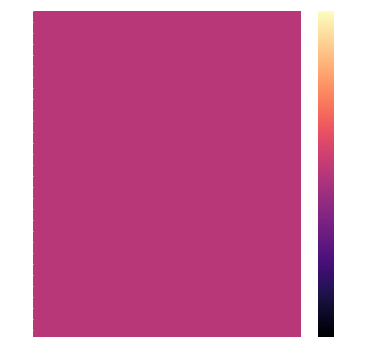

In [ ]:
# there are two much columns to read from directly
# lat's draw the heatmap to show the same 
plt.figure(figsize=(6,6))
sns.heatmap(df.isna(),cmap='magma')

In [ ]:
# There are no missing values in the dataset

In [ ]:
# Let's check for some irrelevant values
# Irrelevant values for this data set could be the values which are not integers

In [ ]:
# let's check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

* All the `features` variables in the dataset are `float` datatypes 
* The `target` variable is an `Object` datatype

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Text(0.5, 1.0, 'Target Class Balance')

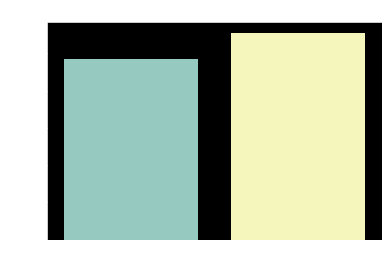

In [ ]:
# Let's chack the balancing of the data
sns.countplot(df.iloc[:,-1])
plt.title('Target Class Balance')

In [ ]:
# The data is properly balanced ,so baised class wouldn't be a problem for our dataset

In [ ]:
# We can see that the data is normalized in the dataset.
# Let's check the distribution of every feature.

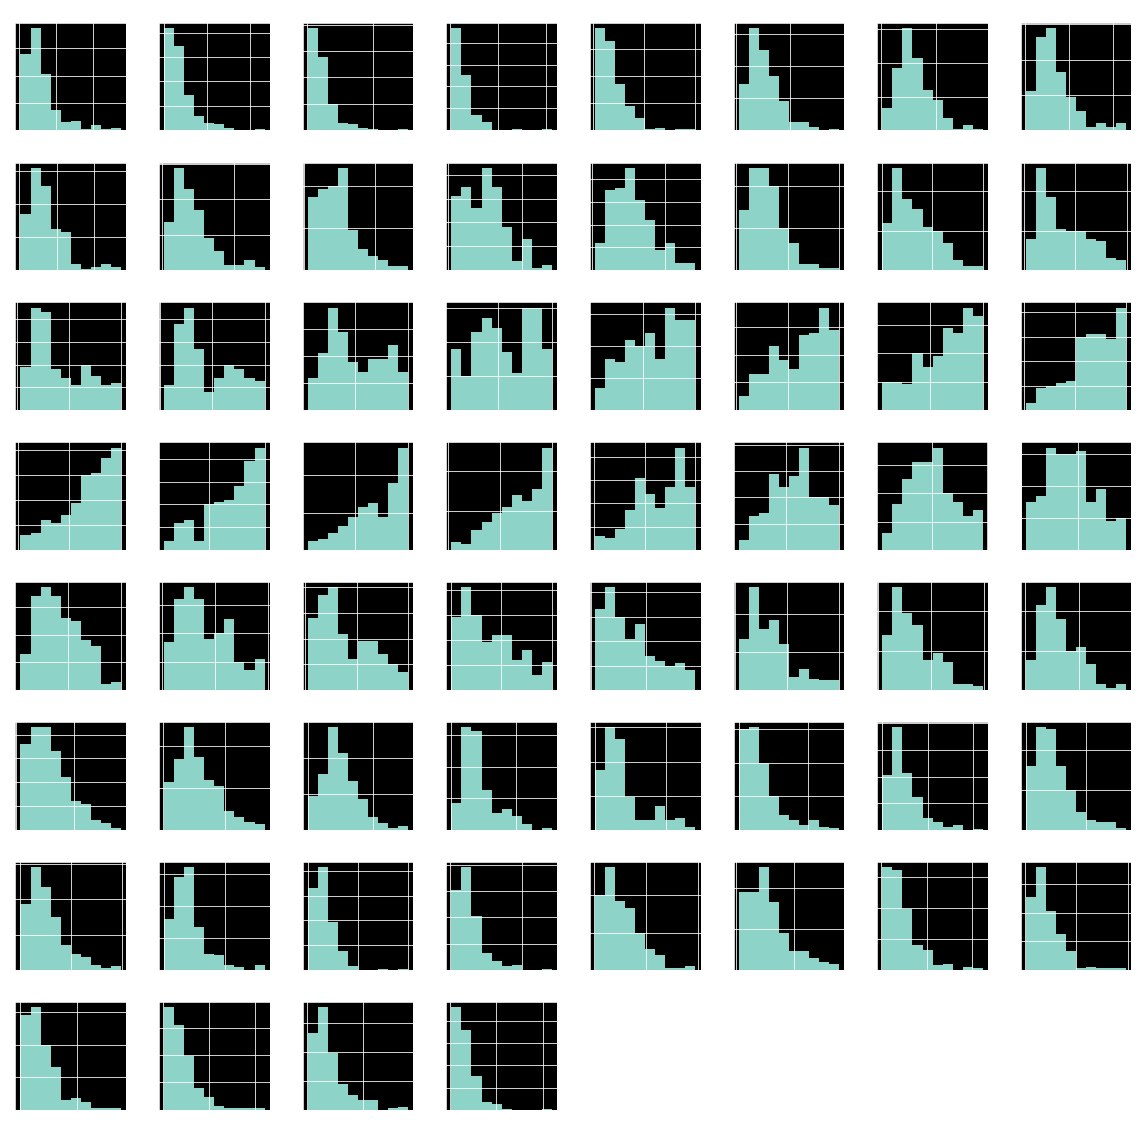

In [ ]:
df.hist(xlabelsize=1, ylabelsize=1, figsize=(20,20));

In [ ]:
# most of the features have a Gaussian Distriboution and other have a exponential distribution

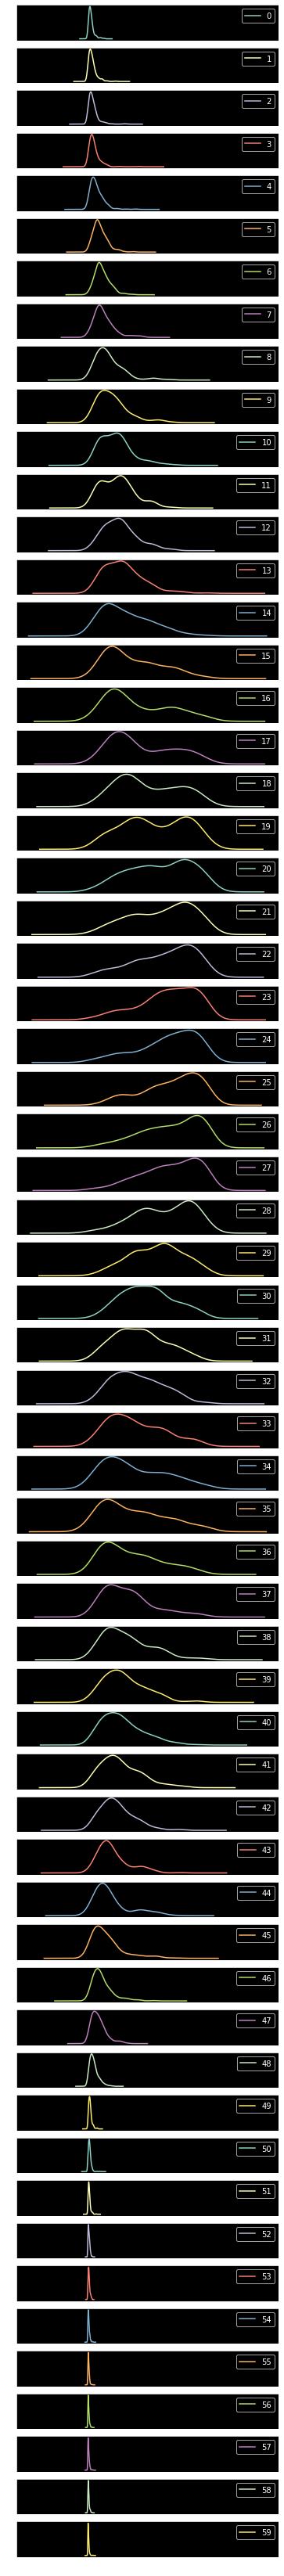

In [ ]:
# Let's check the pdf of all the features of the dataset
df.plot.density(figsize=(6, 60), subplots=True, yticks=[]);

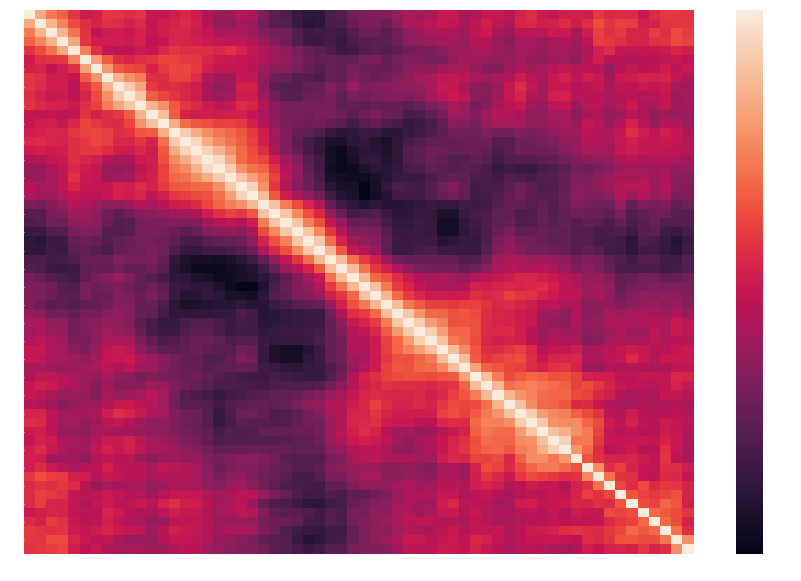

In [ ]:
# Let's get the correlations of the dataset
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

In [ ]:
# There is no high correlation in the dataset.

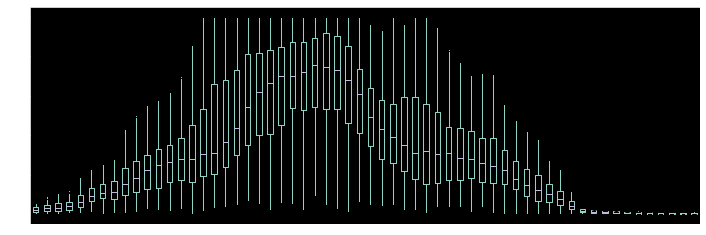

In [ ]:
df.plot.box(figsize=(12,4),xticks=[])

In [ ]:
# We can se a pattern in our dataset

In [ ]:
# As there is a pattern in the data,we might deep dive into more similar plotting techniques

In [ ]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [ ]:
# renaming the Target variable for ease.
df.rename(columns={60:'Label'},inplace=True)

In [ ]:
from pandas.plotting import andrews_curves,parallel_coordinates

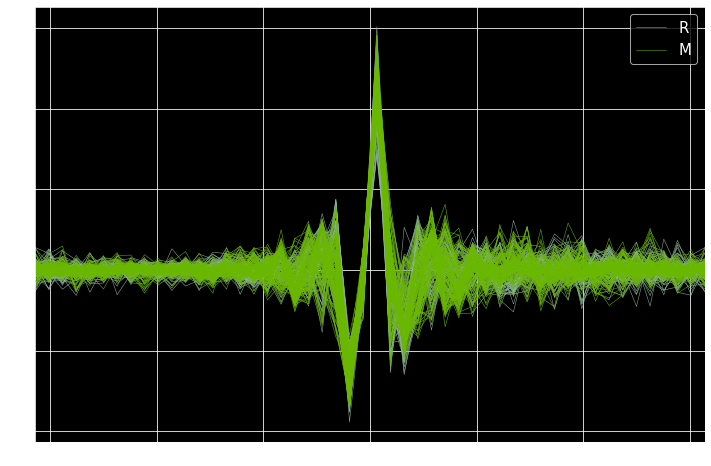

In [ ]:
plt.figure(figsize=(12,8))
andrews_curves(df, 'Label', samples=50, linewidth=0.5,)
plt.legend(fontsize=15)

In [ ]:
# Here we can see that there exists some pattern in the data according to the target variable
# When the sonar hits the rock ,the variance in the observed function in slightly highter than when it hits some mine

#### Inference
* There are 2 classes present in the dataset thus this is a `binary classification` problem.
* There are `60 columns` in the dataset .
* A row is a signal and its represented in the form of 60 columns which contain energy integrated over a certain period of time.
* There are such 111 samples taken at different angles on the metal cylinder.
* And,there are 97 samples taken at different angles on the rock
* This makes a total of `208 observation for our dataset`
* There is no missing or dirty data in the dataset.
* There is no high-correlation among the features in the dataset.
* Though ,there are no high-correlation among the features of the dataset,There exists a pattern among every element of the row as we can see it in the Andrew Curve.
* We can se that the distributed energies(columns of each row) follow a strict normal distribution,thus infering that the samples are signal and are dependent of each other.
* The data is already normalized between [0,1]
* There are no outliers in the dataset are it is a Standardized Dataset

___
## Training the model
___

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
# create X and y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [179]:
X.shape,y.shape

((208, 60), (208,))

In [181]:
# label enoding for the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y.shape

(208,)

In [182]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [183]:
# Splitting train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state=42,shuffle=True)

In [186]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((162, 60), (46, 60), (162,), (46,))

### Training different models to choose the best model

In [ ]:
# as there are few number of observation and as compared to the number of features
from sklearn.model_selection import cross_val_score
# create a dataframe to store metric data 

In [252]:
# Let's start with logistic regression Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)
np.mean(cross_val_score(lr_model,X,y))

0.6300813008130082

In [253]:
# Decision Tree
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(X_train,y_train)
rfc_model.score(X_test,y_test)
np.mean(cross_val_score(rfc_model,X,y))

0.6926829268292682

In [254]:
# Ridge Classifier
from sklearn.linear_model import RidgeClassifier
ridge_model = RidgeClassifier(alpha=1)
ridge_model.fit(X_train,y_train)
ridge_model.score(X_test,y_test)
np.mean(cross_val_score(ridge_model,X,y))

0.6110336817653891

In [255]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
nb_model.score(X_test,y_test)
np.mean(cross_val_score(nb_model,X,y))

0.6234610917537747

In [257]:
# So,let's now try with SVC . SVC models are said to work well where there are less observation as compared to the features.
from sklearn.svm import SVC
svc_model = SVC(C=100)
svc_model.fit(X_train,y_train)
svc_model.score(X_test,y_test)
np.mean(cross_val_score(svc_model,X,y))

0.6305458768873403

In [302]:
from sklearn.metrics import f1_score

# create a datframe to store the svm model details
svm_models_df = pd.DataFrame(columns=['Model-Type','C','gamma','Train_acc','Test_acc','F1_score','avg_CV_score'])


kernels = ['linear','poly','rbf']
reg_term = [1,10,100]
gamma = [1,0.1,0.01]

for k in kernels:
  for c in reg_term:
    for g in gamma:


    
      # instantiate the model
      model = SVC(kernel=k,C=c)
    
      # fit the model
      model.fit(X_train,y_train.ravel())
    
      # predicted the labels
      y_preds = model.predict(X_test)
    
      # scoring metrics
      train_acc = model.score(X_train,y_train)
      test_acc = model.score(X_test,y_test)
      #f1 = f1_score(y_test,y_preds)
      cv_score_mean = np.mean(cross_val_score(model,X,y))
    
      # append to the dataframe of svm models
      svm_models_df = svm_models.append({'Model-Type':k,'C':c,'gamma':g,'Train_acc':train_acc,'Test_acc':test_acc,'F1_score':f1,'avg_CV_score':cv_score_mean},ignore_index=True)

In [303]:
svm_models_df

,Model-Type,C,gamma,Train_acc,Test_acc,F1_score,avg_CV_score
0,linear,1,1,0.827160,0.913043,0.780488,0.625319
1,linear,1,0.1,0.827160,0.913043,0.780488,0.625319
2,linear,1,0.01,0.827160,0.913043,0.780488,0.625319
3,linear,10,1,0.882716,0.869565,0.780488,0.659350
4,linear,10,0.1,0.882716,0.869565,0.780488,0.659350
5,linear,10,0.01,0.882716,0.869565,0.780488,0.659350
6,linear,100,1,0.925926,0.760870,0.780488,0.625319
7,linear,100,0.1,0.925926,0.760870,0.780488,0.625319
8,linear,100,0.01,0.925926,0.760870,0.780488,0.625319
9,poly,1,1,0.932099,0.760870,0.780488,0.630430


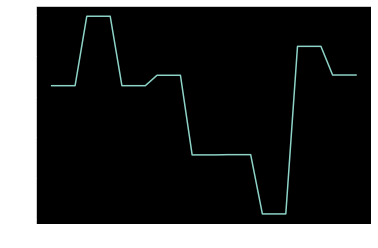

In [297]:
svm_models_df['avg_CV_score'].plot()

In [195]:
# We can see that Ensemble method Random Forest gives us the best CV result
# but as we have less data there is a high chance of model OverFitting to the training data and 
# failing to generalize on new data 

### Tuning the SVM model by finding the best hyper-parameters using GridSearchCV

In [305]:
# Let's run a grid seach on the SVM model
from sklearn.model_selection import GridSearchCV
# hyperparameter to tune
param_grid = {
    'C':[1,10,100],
    'gamma':[1,0.1,0.01,0.001],
    'kernel':['rbg','poly']
}
# instantion the grid model
gs_model_svc = GridSearchCV(svc_model,param_grid=param_grid,n_jobs=3)
gs_model_svc.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=100, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbg', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [249]:
gs_model.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'poly'}

In [250]:
gs_model.best_score_

0.8147727272727273

In [251]:
np.mean(cross_val_score(gs_model,X,y))

0.5772357723577236

In [202]:
# Attempting the Grid Search CV reduces the cross cal score 

In [304]:
np.mean(cross_val_score(svc_model,X,y))

0.6305458768873403

### Tuning the random forest model by finding the best hyper-parameters using GridSearchCV

In [314]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

 # instantion the grid model
rs_model_rfc = RandomizedSearchCV(rfc_model,param_grid,n_jobs=3,verbose=2)
rs_model_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   20.2s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:   32.9s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [316]:
rs_model_rfc.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [317]:
rs_model_rfc.best_score_

0.8331439393939395

___
## PCA model (SVC)
___

In [203]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [233]:
# import pca dependencies
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_pca_ = pca.fit_transform(X)

In [234]:
# train test for PCA dataset
X_pca_train,X_pca_test,y_pca_train,y_pca_test = train_test_split(X_pca,y,test_size=0.22,random_state=42)

In [235]:
X_pca_train.shape,X_pca_test.shape,y_pca_train.shape,y_pca_test.shape

((162, 17), (46, 17), (162,), (46,))

In [236]:
# let's train the models on pca dataframe
svc_model = SVC()
svc_model.fit(X_pca_train,y_pca_train)
svc_model.score(X_pca_test,y_pca_test)
np.mean(cross_val_score(svc_model,X_pca,y))

0.5288037166085947

In [245]:
svc_model.score(X_pca_test,y_pca_test)

0.8043478260869565

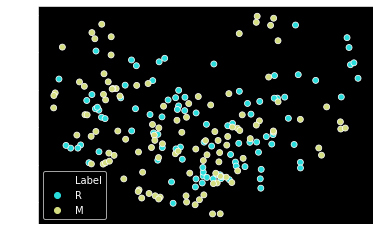

In [244]:
sns.scatterplot(X_pca[:,0],X_pca[:,1],hue=df.Label,palette='rainbow')

In [230]:

pca.explained_variance_ratio_

array([0.31971149, 0.2038306 , 0.0855582 , 0.06459322, 0.05164156,
       0.04451402, 0.04207696, 0.02632652, 0.02230037, 0.01921817,
       0.01565309, 0.01359272, 0.01170142, 0.00956801, 0.00873325,
       0.00766495, 0.0071944 ])

In [231]:
pca.explained_variance_ratio_[:3].sum()

0.609100286959006

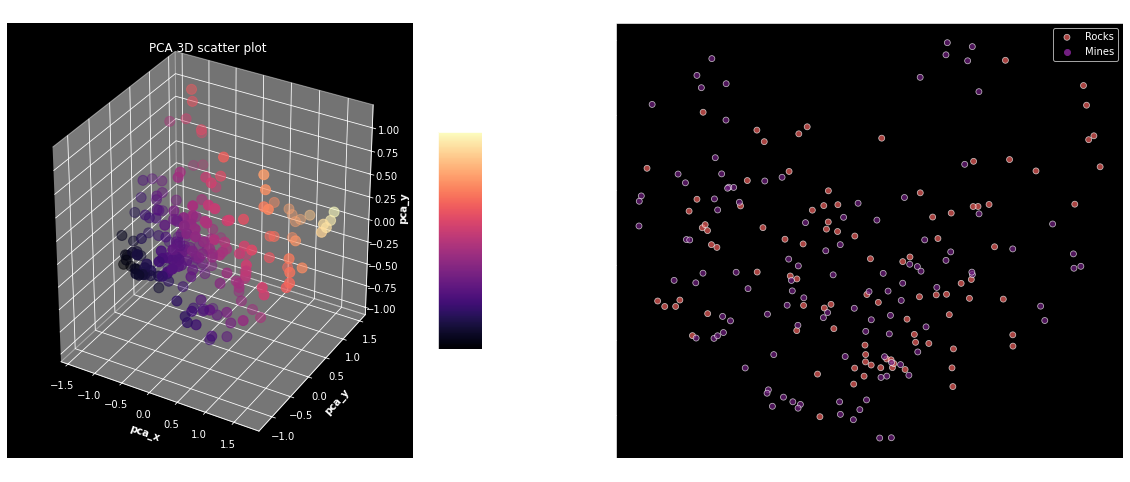

In [247]:
# creating a figure
fig = plt.figure(figsize=(20,8))
# Creating color map 
my_cmap = plt.get_cmap('hsv') 

ax = fig.add_subplot(121,projection='3d')
pca_comp_x = X_pca[:,0]
pca_comp_y = X_pca[:,1]
pca_comp_z = X_pca[:,2]


sctt = ax.scatter(pca_comp_x,pca_comp_y,pca_comp_z,c = (pca_comp_x + pca_comp_y + pca_comp_z),cmap = 'magma',s=100) 

plt.title("PCA 3D scatter plot ") 
ax.set_xlabel('pca_x', fontweight ='bold')  
ax.set_ylabel('pca_y', fontweight ='bold')  
ax.set_zlabel('pca_y', fontweight ='bold') 
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 

fig.add_subplot(122)

y_dict = {0:'Rocks',1:'Mines'}
sns.scatterplot(pca_comp_x,pca_comp_y,hue=y,palette='magma',alpha=0.7)
plt.title("PCA 2D scatter plot ") 
ax.set_xlabel('pca_x', fontweight ='bold')  
ax.set_ylabel('pca_y', fontweight ='bold')  
plt.legend(y_dict.values())

#### Inference :
* We ran a Principle Component Analysis on the Dataset
* We trained the dataset using the Support Vector Classifier
* Running a PCA did not improve the cross validation accuracy of the model

## Metrics and Evaluation

In [326]:
# dependencies
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [320]:
svm_models_df

,Model-Type,C,gamma,Train_acc,Test_acc,F1_score,avg_CV_score
0,linear,1,1,0.827160,0.913043,0.780488,0.625319
1,linear,1,0.1,0.827160,0.913043,0.780488,0.625319
2,linear,1,0.01,0.827160,0.913043,0.780488,0.625319
3,linear,10,1,0.882716,0.869565,0.780488,0.659350
4,linear,10,0.1,0.882716,0.869565,0.780488,0.659350
5,linear,10,0.01,0.882716,0.869565,0.780488,0.659350
6,linear,100,1,0.925926,0.760870,0.780488,0.625319
7,linear,100,0.1,0.925926,0.760870,0.780488,0.625319
8,linear,100,0.01,0.925926,0.760870,0.780488,0.625319
9,poly,1,1,0.932099,0.760870,0.780488,0.630430


*  The SVM model without PCA and tuned hyperparameters gives us the vbest Cross Validation Score

In [332]:
# Best Model

model_best = SVC(C=10,gamma=0.1,kernel='rbf')

model_best.fit(X_train,y_train)

y_preds_best = model_best.predict(X_test)

print('On the Original data: \n')
print('\tAccuracy on the testing set',model_best.score(X_test,y_test))
print()


On the Original data: 

	Accuracy on the testing set 0.8913043478260869



In [336]:
# Classification Report
print(classification_report(y_test,y_preds_best))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.85      0.89      0.87        19

    accuracy                           0.89        46
   macro avg       0.89      0.89      0.89        46
weighted avg       0.89      0.89      0.89        46



In [339]:
# Confusion matrix
confusion_matrix(y_test,y_preds_best)

array([[24,  3],
       [ 2, 17]])

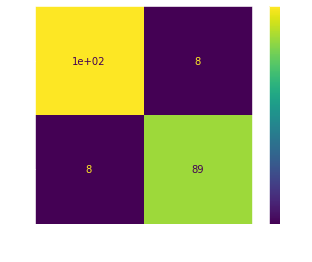

In [343]:
# Plotting the confusion matrix
plot_confusion_matrix(model_best,X,y)